# Import The Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Reading data to a pandas dataframe

In [2]:
# import pandas as pd

# تحديد مسار الملف
file_path = r"E:\proj\2)FINANCE DOMAIN\2_POWER BI &SQL&ML PROJ\vw_ChurnData.xlsx"

# قراءة ملف Excel
data = pd.read_excel(file_path)

# عرض أول 5 صفوف من البيانات
print(data.head())


  Customer_Id  gender  age married           state  referrals  \
0   12699-TEL  Female   23     Yes       Telangana         13   
1   12728-AND  Female   28     Yes  Andhra Pradesh          2   
2   12736-ASS  Female   62      No           Assam         10   
3   12739-HAR    Male   57     Yes         Haryana          1   
4   12746-WES    Male   53      No     West Bengal          7   

   Tenure_in_Months value_deal Phone_Service Multiple_Lines  ...  \
0                 8       none           Yes             No  ...   
1                13       none           Yes            Yes  ...   
2                 3       none           Yes             No  ...   
3                31       none           Yes            Yes  ...   
4                17       none           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      44.799999    559.200012     37.490002   
1      Credit Card      80.300003    324.200012      0.000000   
2  Ba

In [3]:
data.columns

Index(['Customer_Id', 'gender', 'age', 'married', 'state', 'referrals',
       'Tenure_in_Months', 'value_deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'online_security', 'online_backup',
       'device_protection', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason'],
      dtype='object')

# Data Processing

In [4]:
# Drop columns that won't be used for prediction

columns_to_drop = ['Customer_Id', 'Churn_Category', 'Churn_Reason']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns_to_drop, axis=1)
 

# List of columns to be label encoded

columns_to_encode = [

    'gender', 'married', 'state', 'value_deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'online_security', 'online_backup',  'device_protection', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'

    ]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model

In [5]:

# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 # Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [6]:
#Make prediction
y_pred=rf_model.predict(X_test)

In [7]:
#Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[126   7]
 [ 24  43]]


In [8]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       133
           1       0.86      0.64      0.74        67

    accuracy                           0.84       200
   macro avg       0.85      0.79      0.81       200
weighted avg       0.85      0.84      0.84       200



In [9]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

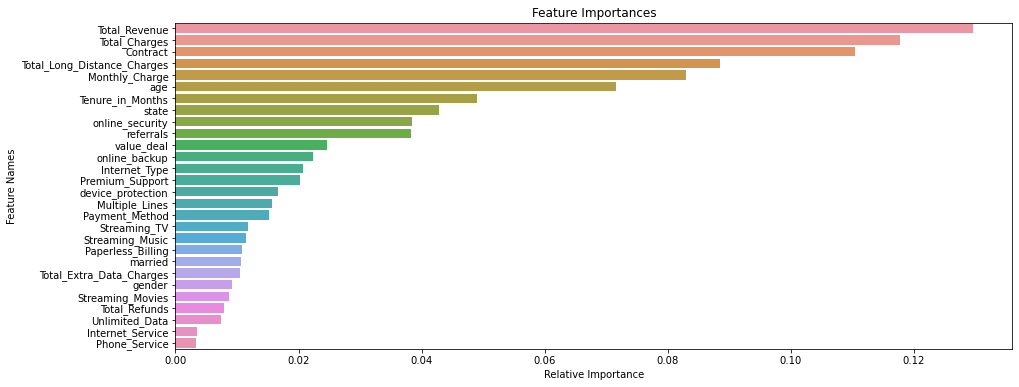

In [10]:
# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

# Use Model for Prediction on New Data

In [11]:
new_data=pd.read_excel(r"E:\proj\2)FINANCE DOMAIN\2_POWER BI &SQL&ML PROJ\vw.JoinData.xlsx")

In [12]:
new_data.head()

,Customer_Id,gender,age,married,state,referrals,Tenure_in_Months,value_deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,13666-UTT,Male,57,Yes,Uttarakhand,15,16,none,Yes,No,...,Bank Withdrawal,95.400002,293.149994,0.0,0,51.029999,344.179993,Joined,Others,Others
1,13744-AND,Female,41,Yes,Andhra Pradesh,8,3,Deal 5,Yes,No,...,Bank Withdrawal,19.650000,19.650000,0.0,0,13.850000,33.500000,Joined,Others,Others
2,13823-TEL,Female,31,Yes,Telangana,1,28,Deal 5,No,none,...,Bank Withdrawal,24.500000,46.400002,0.0,0,0.000000,46.400002,Joined,Others,Others
3,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.650000,19.650000,0.0,0,23.670000,43.320000,Joined,Others,Others
4,17597-HAR,Female,33,Yes,Haryana,2,6,Deal 5,No,none,...,Bank Withdrawal,29.850000,29.850000,0.0,0,0.000000,29.850000,Joined,Others,Others


In [14]:
# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(r"E:\proj\2)FINANCE DOMAIN\2_POWER BI &SQL&ML PROJ\vw.JoinData.xlsx")

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_Id']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_Id', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"E:\proj\2)FINANCE DOMAIN\2_POWER BI &SQL&ML PROJ\Predictions.csv", index=False)

  Customer_Id  gender  age married           state  referrals  \
0   13666-UTT    Male   57     Yes     Uttarakhand         15   
1   13744-AND  Female   41     Yes  Andhra Pradesh          8   
2   13823-TEL  Female   31     Yes       Telangana          1   
3   13946-HAR  Female   41     Yes         Haryana          1   
4   17597-HAR  Female   33     Yes         Haryana          2   

   Tenure_in_Months value_deal Phone_Service Multiple_Lines  ...  \
0                16       none           Yes             No  ...   
1                 3     Deal 5           Yes             No  ...   
2                28     Deal 5            No           none  ...   
3                 3     Deal 5           Yes             No  ...   
4                 6     Deal 5            No           none  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.400002    293.149994           0.0   
1  Bank Withdrawal      19.650000     19.650000           0.0   
2  Ba